In [21]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [22]:
def variance_experiment(n_shots):
    n_trials = 100

    results = []
    dev = qml.device('default.qubit', wires = 1, shots = n_shots)
    @qml.qnode(dev)

    def circuit():
        qml.Hadamard(wires = 0)
        return qml.expval(qml.PauliZ(wires = 0))
    
    for exp in range(n_trials):
        results.append(circuit())

    return np.var(results)

In [23]:
num_shots = 100
variance_experiment(num_shots)

np.float64(0.012171000000000003)

In [24]:
def variance_scaling(n_shots):
    return 1/n_shots

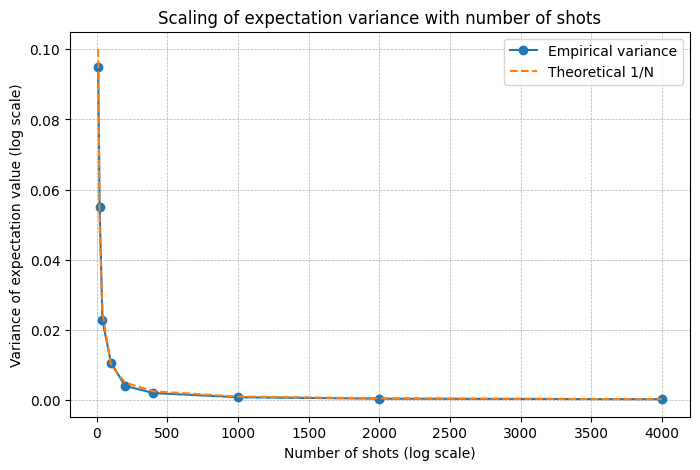

In [29]:
# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
plt.figure(figsize=(8, 5))
plt.plot(shot_vals, results_experiment, 'o-', label="Empirical variance")
plt.plot(shot_vals, results_scaling, '--', label="Theoretical 1/N")
plt.xlabel("Number of shots (log scale)")
plt.ylabel("Variance of expectation value (log scale)")
plt.title("Scaling of expectation variance with number of shots")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.show()